In [186]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [187]:
def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    e = y - tx@w
    return 1/N * 0.5 * e.T@e 

In [188]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w_optimal = np.linalg.solve(tx.T@tx, tx.T@y)
    return w_optimal, compute_mse(y, tx, w_optimal)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [189]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    w_optimal, mse = least_squares(y, tx)
    print('w* = {}'.format(w_optimal))
    print('mse = {}'.format(mse))

Test it here

In [190]:
test_your_least_squares()

w* = [73.293922   13.47971243]
mse = 15.385887868829402


In [191]:
 height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

w_opti = np.array([73.29197521, 13.47935439])
compute_mse(y, tx, w_opti)

15.385889827927251

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

shape of x (50,)
shape of y (50,)


[&lt;matplotlib.lines.Line2D at 0x123b2460&gt;]

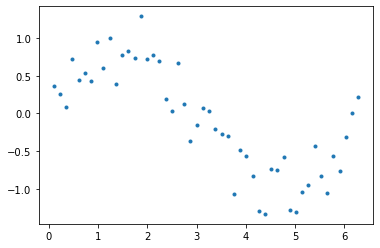

In [192]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

plt.plot(x, y, linestyle='', marker='.')

In [193]:
def compute_rmse(y, tx, w):
    return np.sqrt(2 * compute_mse(y, tx, w))

In [194]:
def least_squares_rmse(y, tx):
    """calculate the least squares solution."""
    N = y.shape[0]
    w_optimal = np.linalg.solve(tx.T@tx, tx.T@y)
    return w_optimal, compute_rmse(y, tx, w_optimal)

In [195]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    N = x.shape[0]
    base = np.ones(N)
    powered = np.ones(N)
    for _ in range(degree) :
        powered *= x
        base = np.concatenate((base, powered))
    return base.reshape(-1, N).transpose()

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [196]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        phi_x = build_poly(x, degree)
        
        weights, rmse = least_squares(y, phi_x)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.11133351726547977
Processing 2th experiment, degree=3, rmse=0.033432526197090515
Processing 3th experiment, degree=7, rmse=0.031164734143882135
Processing 4th experiment, degree=12, rmse=0.030528971788086553


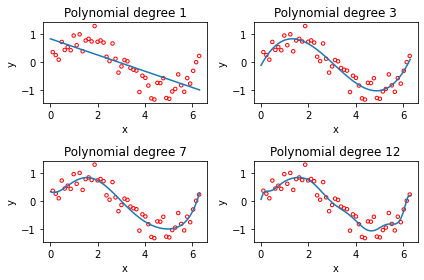

In [197]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [198]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)

    N = x.shape[0]
    index_max = int(ratio * N)
    indexes = np.random.permutation(np.arange(N))
    x_shuffled = x[indexes]
    y_shuffled = y[indexes]

    x_train = x_shuffled[:index_max]
    y_train = y_shuffled[:index_max]
    x_test = x_shuffled[index_max:]
    y_test = y_shuffled[index_max:]

    return x_train, y_train, x_test, y_test

Then, test your `split_data` function below.

In [199]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)

    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    
    weights, rmse_tr = least_squares(y_train, phi_x_train)

    rmse_te = compute_rmse(y_test, phi_x_test, weights)

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [200]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.122, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.035, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.032, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.029, Testing RMSE=0.253
proportion=0.5, degree=1, Training RMSE=0.103, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.028, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.027, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.021, Testing RMSE=1.591
proportion=0.1, degree=1, Training RMSE=0.091, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.004, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.019
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.376


# 3 Ridge Regression
Please fill in the function below.

In [220]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = y.shape[0]
    D = tx.shape[1]
    product = tx.T@tx
    w_optimal = np.linalg.solve(product + 2*N*lambda_*np.identity(N), tx.T@y)
    return w_optimal, compute_rmse(y, tx, w_optimal)

In [215]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)

    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        weights, tr = ridge_regression(y_train, phi_x_train, lambda_)
        te = compute_rmse(y_test, phi_x_test, weights)
        rmse_tr.append(tr)
        rmse_te.append(te)
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



In [221]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

ValueError: operands could not be broadcast together with shapes (8,8) (25,25) 